In [1]:
import hdf5plugin
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import sys, os

sys.path.append('./Tool_box/')
from utilbcid_without_omega import com


In [2]:
scan = 6
shape = 128

data_root = './Data/pick_up/'
data_file = data_root + '%i_%i.npz'%(scan, shape)


In [3]:
data = np.load(data_file)['data'][:]
print(data.shape)

rc = np.sum(data, axis=(1,2))

(700, 128, 128)


/tmp/ipykernel_3238143/1574880276.py:15: RuntimeWarning: divide by zero encountered in log10
  ax[1].imshow(np.log10(cro_sec_q2q3), aspect='auto')
/tmp/ipykernel_3238143/1574880276.py:18: RuntimeWarning: divide by zero encountered in log10
  ax[2].imshow(np.log10(cro_sec_q1q3), aspect='auto')


Text(0.5, 1.0, 'Cross section Q1Q3')

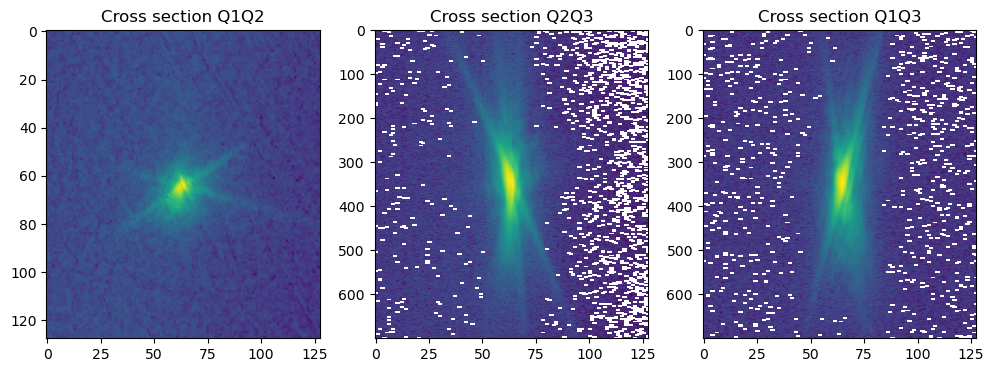

In [4]:
## q1 vertical, q2 horizontal, q3 axial diraction
fig, ax = plt.subplots(1, 3, figsize=(3 * 4, 1 * 4))

# cro_sec_q1q2 = data[data.shape[0]//2, :, :]
# cro_sec_q2q3 = data[:, data.shape[1]//2, :]
# cro_sec_q1q3 = data[:, :, data.shape[2]//2]

cro_sec_q1q2 = np.sum(data, axis = 0)
cro_sec_q2q3 = np.sum(data, axis = 1)
cro_sec_q1q3 = np.sum(data, axis = 2)

ax[0].imshow(np.log10(cro_sec_q1q2), aspect='auto')
ax[0].set_title('Cross section Q1Q2')

ax[1].imshow(np.log10(cro_sec_q2q3), aspect='auto')
ax[1].set_title('Cross section Q2Q3')

ax[2].imshow(np.log10(cro_sec_q1q3), aspect='auto')
ax[2].set_title('Cross section Q1Q3')

(128, 128, 128)
(128, 128, 128)
63
346


/tmp/ipykernel_3238143/2112550032.py:51: RuntimeWarning: divide by zero encountered in log10
  ax[1,1].imshow(np.log10(cro_sec_q2q3))
/tmp/ipykernel_3238143/2112550032.py:55: RuntimeWarning: divide by zero encountered in log10
  ax[1,2].imshow(np.log10(cro_sec_q1q3))


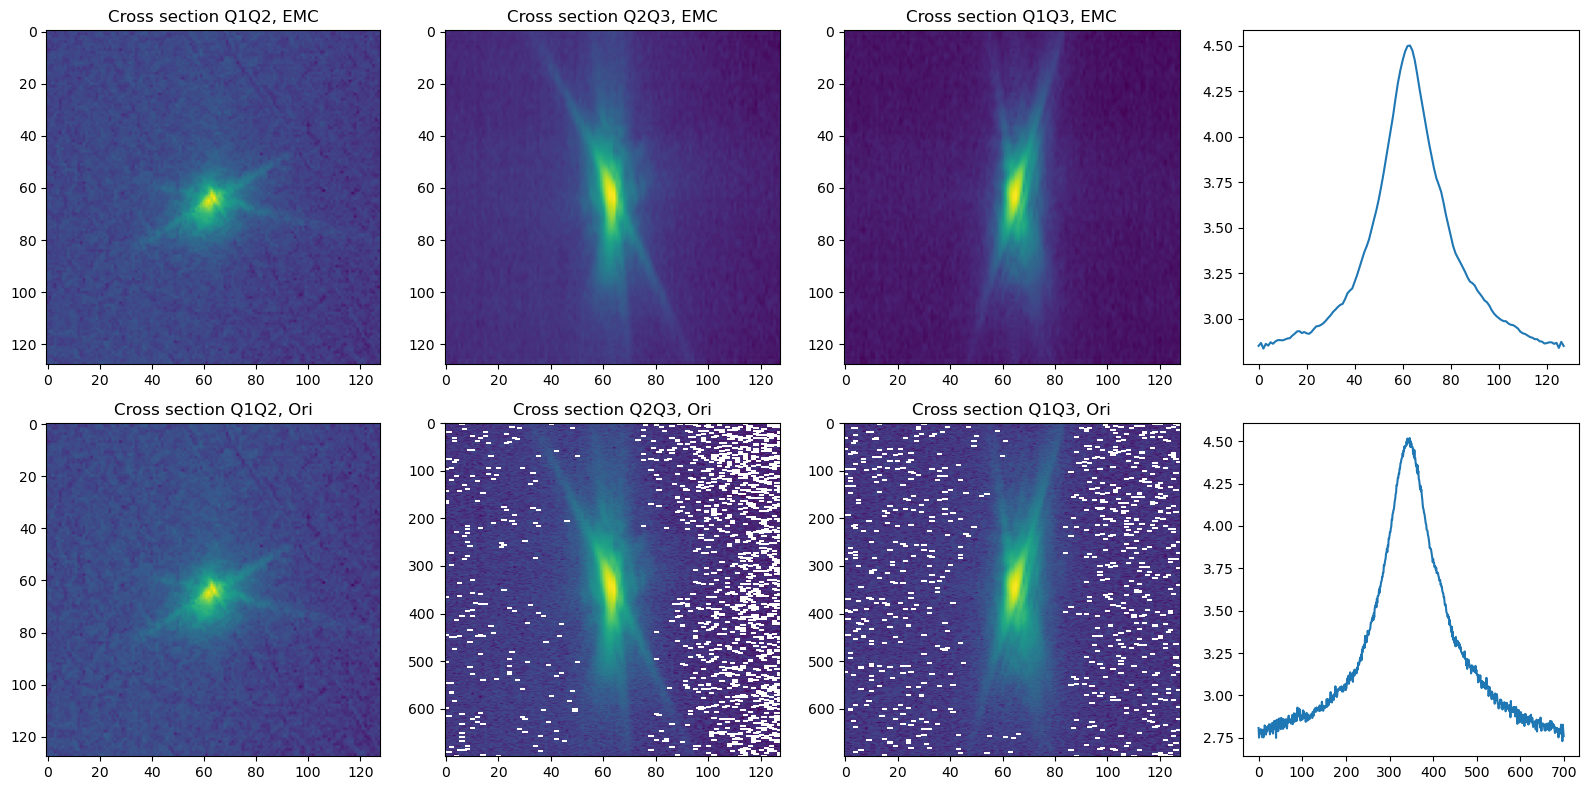

In [11]:

#scan = 12
#shape = 128

data_emc_root = './Data/EMC_results/'
data_emc_file = data_emc_root + 'corr_%i_06_5e3_%i.npz'%(scan, shape)


line_up = 10
line_bottom = 115

data_EMC = np.load(data_emc_file )['W'][:]
#data_EMC = np.flip(data_EMC, axis=0)
print(data_EMC.shape)
print(data_EMC.shape)

rc_EMC = np.sum(data_EMC, axis=(1,2))

## q1 vertical, q2 horizontal, q3 axial diraction
fig, ax = plt.subplots(2, 4, figsize=(4 * 4, 2 * 4))

# cro_sec_q1q2 = data[data.shape[0]//2, :, :]
# cro_sec_q2q3 = data[:, data.shape[1]//2, :]
# cro_sec_q1q3 = data[:, :, data.shape[2]//2]

cro_sec_q1q2_EMC = np.sum(data_EMC, axis = 0)
cro_sec_q2q3_EMC = np.sum(data_EMC, axis = 1)
cro_sec_q1q3_EMC = np.sum(data_EMC, axis = 2)

ax[0,0].imshow(np.log10(cro_sec_q1q2_EMC))
ax[0,0].set_title('Cross section Q1Q2, EMC')

ax[0,1].imshow(np.log10(cro_sec_q2q3_EMC))
ax[0,1].set_title('Cross section Q2Q3, EMC')
ax[0,1].set_aspect('auto')

ax[0,2].imshow(np.log10(cro_sec_q1q3_EMC))
ax[0,2].set_title('Cross section Q1Q3, EMC')
ax[0,2].set_aspect('auto')
#ax[0,2].axhline(y=line_up, xmin=0,xmax=150, color='r')
#ax[0,2].axhline(y=line_bottom, xmin=0,xmax=150, color='r')


ax[0,3].plot(np.log10(rc_EMC))
print(np.argmax(rc_EMC))
ax[0,3].set_aspect('auto')


ax[1,0].imshow(np.log10(cro_sec_q1q2))
ax[1,0].set_title('Cross section Q1Q2, Ori')

ax[1,1].imshow(np.log10(cro_sec_q2q3))
ax[1,1].set_title('Cross section Q2Q3, Ori')
ax[1,1].set_aspect('auto')

ax[1,2].imshow(np.log10(cro_sec_q1q3))
ax[1,2].set_title('Cross section Q1Q3, Ori')
ax[1,2].set_aspect('auto')

ax[1,3].plot(np.log10(rc))
print(np.argmax(rc))
ax[1,3].set_aspect('auto')

plt.tight_layout()

Text(0.5, 1.0, 'Trajectory')

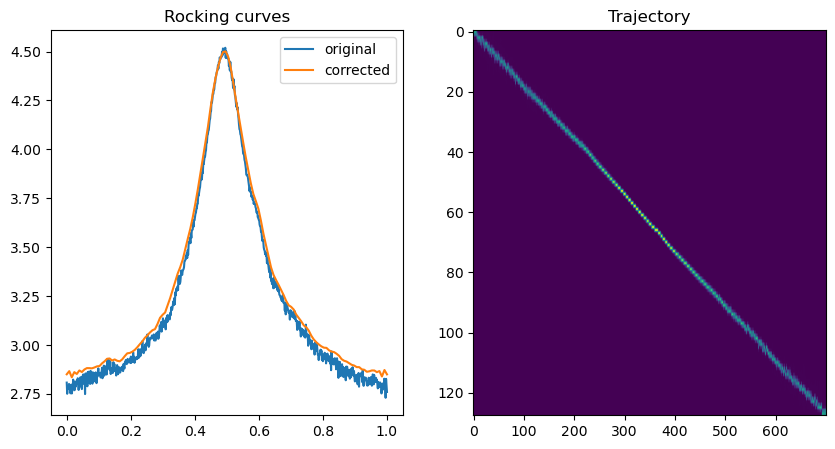

In [10]:
gonphi_1 = np.linspace(0, 1, len(data))
gonphi_2 = np.linspace(0, 1, len(data_EMC))

Pjk = np.load(data_emc_file )['Pjk'][:]


fig, ax = plt.subplots(1,2, figsize=(10, 5))
ax[0].plot(gonphi_1, np.log10(rc), label='original')
ax[0].plot(gonphi_2, np.log10(rc_EMC), '-', label='corrected')
ax[0].set_title('Rocking curves')
ax[0].legend()
ax[1].imshow(Pjk, aspect='auto')
ax[1].set_title('Trajectory')


In [7]:
Pjk_EMC = np.load(data_emc_file )['Pjk'][:]


### Center of mass anaylsis

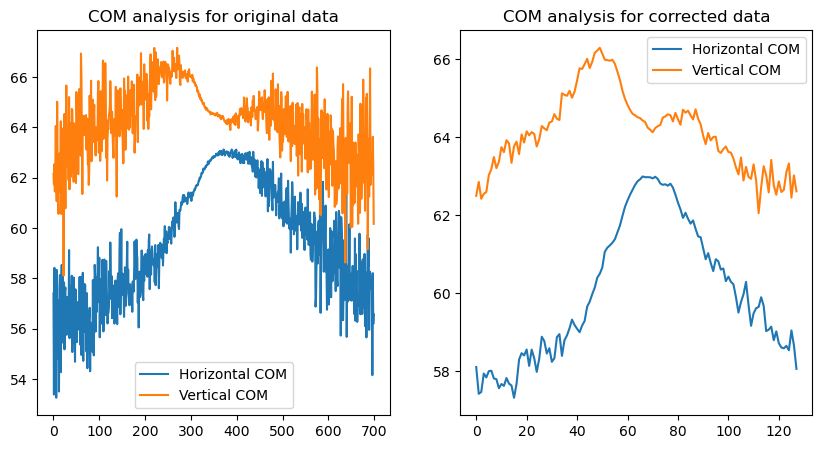

In [8]:
horizontal_com_emc = []
vertical_com_emc = []

horizontal_com = []
vertical_com = []

for frame_ in data:
    h_com_temp_, v_com_temp_ = com(frame_)

    horizontal_com.append(h_com_temp_)
    vertical_com.append(v_com_temp_)

for frame_ in data_EMC:
    h_com_temp_, v_com_temp_ = com(frame_)

    horizontal_com_emc.append(h_com_temp_)
    vertical_com_emc.append(v_com_temp_)
    
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(horizontal_com, label='Horizontal COM')
ax[0].plot(vertical_com, label='Vertical COM')
ax[0].set_title('COM analysis for original data')
ax[0].legend()

ax[1].plot(horizontal_com_emc, label='Horizontal COM')
ax[1].plot(vertical_com_emc, label='Vertical COM')
ax[1].set_title('COM analysis for corrected data')
ax[1].legend()